In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns 

##Numpy

In [2]:
x = np.random.randn(1000)  # 1000 draws from N(0,1)
x[:10]                     # view the first 10 elements

array([ 0.35973079,  0.59579931, -0.56582699, -0.17707843, -1.05321293,
        1.40916724,  0.25210403, -1.15888753,  1.30032559, -1.23115986])

###Histogram of the array 

$\alpha + \beta$

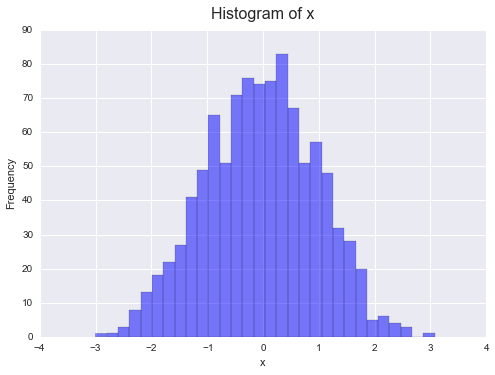

In [3]:
plt.hist(x, bins=30, color='b', alpha=0.5)  # histogram of x, 30 bins, blue, slightly transparent; 
plt.ylabel('Frequency'); plt.xlabel('x'); plt.title('Histogram of x', y=1.02, fontsize=16); 

###Describe the array

In [4]:
print 'mean     :', np.round(x.mean(), 3)     
print 'st. dev. :', np.round(x.std(), 3)    
print 'variance :', np.round(x.var(), 3)
print 'min      :', np.round(x.min(), 3)
print 'max      :', np.round(x.max(), 3)
print 'shape    :', x.shape  # note this is an attribute, not a method
print 'length   :', len(x)

mean     : -0.036
st. dev. : 0.994
variance : 0.988
min      : -3.002
max      : 3.078
shape    : (1000,)
length   : 1000


###Subsetting the array

In [5]:
print x[:3]        # first 3 elements
print x[-3:]       # last 3 elements
print x[4:7]       # 3 elements starting at index 4
print x[:6:2]      # every other element from the first 6 elements
print x[::-2][:3]  # reverse the array, take every other element, subset to first 3

[ 0.35973079  0.59579931 -0.56582699]
[ -7.41626807e-04  -8.46051143e-01   5.91700400e-01]
[-1.05321293  1.40916724  0.25210403]
[ 0.35973079 -0.56582699 -1.05321293]
[  5.91700400e-01  -7.41626807e-04   1.12084913e+00]


###argmin & argmax 

In [6]:
print np.argmin(x)     # the index of the minimum value in the array
print x[np.argmin(x)]  # the value corresponding to that index
print np.min(x)        # same thing
print np.argmax(x)     # and so on...
print x[np.argmax(x)]  
print np.max(x)

199
-3.00248088673
-3.00248088673
251
3.07802924392
3.07802924392


###$n$ largest elements

In [7]:
largest5 = np.argpartition(x, -5)[-5:]  # partial sort is fast, but note order of result!!
print x[largest5]

[ 2.45757201  3.07802924  2.62062422  2.4973345   2.61194065]


In [8]:
largest5 = np.argsort(x)[-5:]  # complete sort is slower, but ordered results
print x[largest5]

[ 2.45757201  2.4973345   2.61194065  2.62062422  3.07802924]


In [9]:
def n_largest(arr, n, sorted=False):
    '''
    Return the indices of the n largest elements in arr. 
    If sorted, complete sort the array and return the 
    indices for the elements ordered least to greatest. 
    '''
    if sorted:
        return np.argsort(x)[-5:]
    else:
        return np.argpartition(arr, -n)[-n:]

print x[n_largest(x, 5)]
print x[n_largest(x, 5, sorted=True)]

[ 2.45757201  3.07802924  2.62062422  2.4973345   2.61194065]
[ 2.45757201  2.4973345   2.61194065  2.62062422  3.07802924]


###2D arrays

In [10]:
x = x.reshape(100, 10)
print 'new shape of x:', x.shape

new shape of x: (100, 10)


###Subsetting in two dimensions

In [11]:
print x[:10, :5]  # first 10 rows, first 5 columns

[[ 0.35973079  0.59579931 -0.56582699 -0.17707843 -1.05321293]
 [-0.26410336 -0.11484386  0.25526291  0.32681497 -0.17516635]
 [-0.39735736  1.23286017 -1.03217971  0.12043713  0.06920716]
 [-0.40902449  0.48792283 -0.39923261 -0.50892756  0.76815399]
 [-0.24619984  1.82385504  1.40655654  0.63293448 -0.21840447]
 [-0.1287826   1.25337158 -1.19143005 -0.44808546 -0.52354592]
 [-1.31760752  0.18980812  0.39724813  0.3416159  -1.24628544]
 [ 0.42965439  1.82678541 -0.06919504  1.31338907  1.2406593 ]
 [ 0.46640395 -1.09163082 -0.43041082  0.66084893  1.26310398]
 [-0.94164454  0.0981151  -1.25528261  0.11244241  0.69347414]]


###Describe 

In [12]:
print x.mean(axis=0)  # mean over rows

[ -1.31772834e-01   1.33000007e-01  -1.84196357e-01   1.36273649e-02
   1.02141667e-02   1.22906335e-01   1.92434418e-02  -9.40280280e-02
   6.79572902e-05  -2.48388764e-01]


In [13]:
print x.mean(axis=1)  # mean over columns

[-0.02690388  0.2775243   0.20224858 -0.51594934  0.28384686 -0.25293883
 -0.05557174  0.15132503 -0.10347102 -0.05520989 -0.40837907  0.31090036
  0.04026476  0.08311213  0.02345225 -0.22398393  0.15131019  0.41772188
 -0.82034331 -0.2140774   0.0415439   0.12209714 -0.36939653  0.7108997
  0.20698319  0.17765043  0.15296142 -0.28779356 -0.07553005 -0.47878001
 -0.19519166 -0.32692251  0.34173213 -0.2032509   0.06311512  0.55652502
 -0.36806541  0.64142592  0.24477361 -0.30313838 -0.54108275  0.06888312
  0.42250479  0.53261946 -0.2398111   0.22218738 -0.3095368   0.10750328
 -0.19966572  0.13045416 -0.02325513 -0.16051343 -0.39976384  0.07739296
  0.11841269 -0.0281554  -0.32286442 -0.25339647  0.0037371  -0.18481818
 -0.45956575 -0.62977025  0.04088583 -0.19118633  0.00330319 -0.08158461
  0.67990643  0.10997839  0.03059626 -0.12151461 -0.04845083 -0.28370986
 -0.15306236 -0.10533997  0.30317141  0.20669144 -0.18838455  0.53298942
 -0.34421039 -0.13689582  0.04315114  0.06724998 -0.

##Pandas

In [14]:
s = pd.Series(np.random.randn(1000))  # Series
s.shape

(1000,)

In [15]:
s.describe()  # descriptive statistics

count    1000.000000
mean       -0.008404
std         0.995717
min        -3.096751
25%        -0.684944
50%         0.007640
75%         0.635887
max         4.449218
dtype: float64

###Easy plotting in Pandas

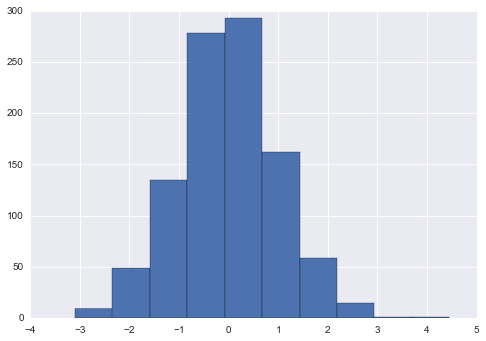

In [16]:
s.hist(); 

###Index 

In [17]:
s.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [18]:
s.index.values[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
s = pd.Series(np.random.randn(1000), index = ['a','b','c','d','e','f','g','h','i','j'] * 100)

In [20]:
s.index

Index([u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j', 
       ...
       u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j'],
      dtype='object', length=1000)

In [21]:
s.head()  # equivalent to s[:5]

a    0.480649
b    0.296039
c    1.559428
d    1.159576
e    1.126089
dtype: float64

###Selecting by index

[Note the Pandas docs for indexing options.](http://pandas.pydata.org/pandas-docs/version/0.15.2/indexing.html#different-choices-for-indexing)

In [22]:
s.ix['a'].head()  # ix will also take integers

a    0.480649
a   -1.678022
a   -0.242941
a   -0.191286
a   -0.093750
dtype: float64

In [23]:
s.loc['b'].head()

b    0.296039
b   -0.047207
b   -1.586004
b   -1.356379
b   -0.960712
dtype: float64

In [24]:
#s.iloc['a']  # this throws an error since iloc expects an integer

###Boolean indexing (masking)

In [25]:
(s > 0).head()  

a    True
b    True
c    True
d    True
e    True
dtype: bool

In [26]:
s[s > 0].head() 

a    0.480649
b    0.296039
c    1.559428
d    1.159576
e    1.126089
dtype: float64

###Data frame from array

In [27]:
df = pd.DataFrame(np.random.randn(1000).reshape(100, 10))
df.shape

(100, 10)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.815277,-1.063672,0.300824,0.395850,0.514517,0.667627,0.002359,1.495104,0.465181,-0.013415
1,0.795083,-0.012986,0.382194,0.222208,-0.322641,1.195609,0.388969,-0.670427,-0.805757,0.485942
2,-0.050164,-0.093422,-0.201932,-0.293422,1.965747,-0.550011,1.983426,-1.246699,2.638995,-0.624673
3,2.512696,-1.221828,-1.070902,0.231011,-1.236860,-0.089283,-1.363142,-0.207014,0.284304,1.484649
4,-0.590091,1.558136,0.816073,0.662078,-0.858696,-2.220318,-0.366172,0.049772,-0.263912,2.231625


In [29]:
df.describe() 

,0,1,2,3,4,5,6,7,8,9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.094380,-0.054068,0.215490,0.191869,-0.084597,-0.149412,-0.004247,-0.058292,-0.055546,-0.065212
std,0.969570,1.073664,0.841087,1.158943,1.010123,1.043226,0.892802,1.052902,0.996900,1.059221
min,-2.910561,-3.650530,-2.170181,-2.453943,-2.409786,-2.619386,-2.190314,-2.493085,-3.212619,-2.340602
25%,-0.711176,-0.701007,-0.363884,-0.634952,-0.817703,-0.775090,-0.737884,-0.778563,-0.664682,-0.777374
50%,-0.126290,-0.138166,0.265926,0.226610,-0.152760,-0.116106,-0.023186,-0.084042,0.078494,-0.054801
75%,0.536699,0.738558,0.781150,0.931961,0.816860,0.425174,0.444900,0.647957,0.613410,0.698476
max,2.662303,1.896182,1.976441,3.145319,1.965747,2.844362,2.169294,2.583740,2.638995,2.362681


In [30]:
df.mean()  # equivalent to df.mean(axis=0) & df.describe().loc['mean]

0   -0.094380
1   -0.054068
2    0.215490
3    0.191869
4   -0.084597
5   -0.149412
6   -0.004247
7   -0.058292
8   -0.055546
9   -0.065212
dtype: float64

###Data frame from list of lists

In [31]:
pd.DataFrame([[0, 2, 4], [1, 3, 5]])

,0,1,2
0,0,2,4
1,1,3,5


###Data frame from dictionary

In [32]:
pd.DataFrame({'a' : [0, 2, 4], 'b' : [1, 3, 5]}, index=['r1','r2','r3'])

,a,b
r1,0,1
r2,2,3
r3,4,5


###Data frame from CSV files

In [33]:
schools = pd.read_csv('data/Schools.csv')
schools.head(3)   

,schoolID,schoolName,schoolCity,schoolState,schoolNick
0,abilchrist,Abilene Christian University,Abilene,TX,Wildcats
1,adelphi,Adelphi University,Garden City,NY,Panthers
2,adrianmi,Adrian College,Adrian,MI,Bulldogs


In [34]:
players = pd.read_csv('data/SchoolsPlayers.csv')
players.head(3)

,playerID,schoolID,yearMin,yearMax
0,aardsda01,pennst,2001,2001
1,aardsda01,rice,2002,2003
2,abbeybe01,vermont,1888,1892


###Merging data frames

[Pandas docs on concatenating, merging, & joining data frames](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [35]:
print schools.shape
print players.shape

(749, 5)
(6147, 4)


In [36]:
players2 = pd.merge(players, schools, on='schoolID', how='left')
print players2.shape

(6147, 8)


In [37]:
pd.concat([players[:2], players[2:4]])

,playerID,schoolID,yearMin,yearMax
0,aardsda01,pennst,2001,2001
1,aardsda01,rice,2002,2003
2,abbeybe01,vermont,1888,1892
3,abbotgl01,carkansas,1970,1970


###Aggregation, split-apply-combine

In [38]:
cnt = players2.groupby('schoolID').size()  # how many players by school?
cnt.sort(ascending=False)
cnt.head()

schoolID
usc          102
texas        100
arizonast     98
stanford      82
michigan      77
dtype: int64

In [39]:
cnt2 = players2.groupby(['schoolState','yearMax']).size()  # how many players by state-year?
cnt2.sort(ascending=False)
cnt2.head()

schoolState  yearMax
CA           1987       30
             1986       22
             1997       21
             1978       20
TX           2004       20
dtype: int64

###Passing functions to aggregations

In [40]:
players2[['schoolState','yearMax']].groupby('schoolState').apply(np.max).head()  # max value of yearMax by schoolID

,schoolState,yearMax
schoolState,,
AL,AL,2008
AR,AR,2007
AZ,AZ,2008
CA,CA,2008
CO,CO,2005


###Use categories as grouping variables

In [41]:
players2['schoolID'].dtype

dtype('O')

In [42]:
players2['schoolID'] = players2['schoolID'].astype('category')
players2['schoolID'].dtype

category

In [43]:
cnt = players2.groupby('schoolID').size()  # how many players by school, more efficiently... 
cnt.sort(ascending=False)
cnt.head()

schoolID
usc          102
texas        100
arizonast     98
stanford      82
michigan      77
dtype: int64

###Value counts

In [44]:
players2['schoolState'].value_counts().head() 

CA    857
TX    411
PA    348
NY    275
FL    265
dtype: int64

###Sort by column

In [45]:
players2.sort(columns='yearMin', ascending=False).head()

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,schoolNick
2561,hudsoda01,olddom,2006,2008,Old Dominion University,Norfolk,VA,Monarchs
3821,mooread01,utarl,2006,2006,University of Texas at Arlington,Arlington,TX,Mavericks
332,beckhgo01,georgia,2006,2008,University of Georgia,Athens,GA,Bulldogs
3479,masteju01,sandiegost,2006,2006,San Diego State University,San Diego,CA,Aztecs
868,carpean01,longbeach,2006,2006,"California State University, Long Beach",Long Beach,CA,49ers


In [46]:
players2.sort(columns=['yearMin', 'yearMax'], ascending=[0, 1]).head()

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,schoolNick
868,carpean01,longbeach,2006,2006,"California State University, Long Beach",Long Beach,CA,49ers
2567,huffda01,ucla,2006,2006,"University of California, Los Angeles",Los Angeles,CA,Bruins
3479,masteju01,sandiegost,2006,2006,San Diego State University,San Diego,CA,Aztecs
3821,mooread01,utarl,2006,2006,University of Texas at Arlington,Arlington,TX,Mavericks
1402,dillojo02,txtech,2006,2007,Texas Tech University,Lubbock,TX,Red Raiders


###Creating and dropping columns

In [47]:
players2['duration'] = players2.eval('yearMax - yearMin')  # equivalent to players2['yearMax'] - players2['yearMin']
players2.head(3) 

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,schoolNick,duration
0,aardsda01,pennst,2001,2001,Pennsylvania State University,State College,PA,Nittany Lions,0
1,aardsda01,rice,2002,2003,Rice University,Houston,TX,Owls,1
2,abbeybe01,vermont,1888,1892,University of Vermont,South Burlington,VT,Catamounts,4


In [48]:
players2.drop('schoolNick', axis=1, inplace=True)  # pass multiple columns to drop in an array
players2.head(3) 

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
0,aardsda01,pennst,2001,2001,Pennsylvania State University,State College,PA,0
1,aardsda01,rice,2002,2003,Rice University,Houston,TX,1
2,abbeybe01,vermont,1888,1892,University of Vermont,South Burlington,VT,4


###Querying a data frame

In [49]:
players2[players2['schoolState'] == 'KY'].head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
4,abbotje01,kentucky,1991,1992,University of Kentucky,Lexington,KY,1
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
221,ballowi01,ekentucky,1916,1920,Eastern Kentucky University,Richmond,KY,4


In [50]:
players2.query('schoolState == "KY"').head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
4,abbotje01,kentucky,1991,1992,University of Kentucky,Lexington,KY,1
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
221,ballowi01,ekentucky,1916,1920,Eastern Kentucky University,Richmond,KY,4


In [51]:
players2.query('schoolState == "KY" & yearMax > 2000').head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
458,blantjo01,kentucky,2000,2002,University of Kentucky,Lexington,KY,2
2647,jacksza01,louisville,2002,2003,University of Louisville,Louisville,KY,1


In [52]:
players2.query('schoolState == {0} & yearMax > {1}'.format('"KY"', '2000')).head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
458,blantjo01,kentucky,2000,2002,University of Kentucky,Lexington,KY,2
2647,jacksza01,louisville,2002,2003,University of Louisville,Louisville,KY,1


In [53]:
state_var = 'KY'
year_var = 2000
players2.query('schoolState == @state_var & yearMax > @year_var').head(3) 

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
458,blantjo01,kentucky,2000,2002,University of Kentucky,Lexington,KY,2
2647,jacksza01,louisville,2002,2003,University of Louisville,Louisville,KY,1


In [54]:
year_list = [2002, 2003]
players2.query('schoolState == @state_var & yearMax in @year_list')

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
458,blantjo01,kentucky,2000,2002,University of Kentucky,Lexington,KY,2
2647,jacksza01,louisville,2002,2003,University of Louisville,Louisville,KY,1


In [55]:
players2[players2['schoolState'].isin(['CO','CA','WA','TX'])].head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
1,aardsda01,rice,2002,2003,Rice University,Houston,TX,1
6,abbotky01,longbeach,1989,1989,"California State University, Long Beach",Long Beach,CA,0
7,abbotky01,ucsd,1987,1988,"University of California, San Diego",La Jolla,CA,1


In [56]:
players2[(players2['schoolState'] == 'KY') & (players2['yearMax'] > 2000)].head(3)

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
458,blantjo01,kentucky,2000,2002,University of Kentucky,Lexington,KY,2
2647,jacksza01,louisville,2002,2003,University of Louisville,Louisville,KY,1


###Querying patterns in string variables

In [57]:
players2[players2['schoolName'].str.contains('Kentucky')].head(3) 

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration
4,abbotje01,kentucky,1991,1992,University of Kentucky,Lexington,KY,1
106,anderjo03,ekentucky,2001,2003,Eastern Kentucky University,Richmond,KY,2
221,ballowi01,ekentucky,1916,1920,Eastern Kentucky University,Richmond,KY,4


###Other common string methods

In [58]:
players2['schoolCity'].str.lower().head(3) 

0       state college
1             houston
2    south burlington
Name: schoolCity, dtype: object

In [59]:
players2['schoolCity'].str.split().head(3)

0       [State, College]
1              [Houston]
2    [South, Burlington]
dtype: object

###Accessing and renaming columns

In [60]:
schools.columns  # or schools.columns.values to get array 

Index([u'schoolID', u'schoolName', u'schoolCity', u'schoolState',
       u'schoolNick'],
      dtype='object')

In [61]:
schools.rename(columns={'schoolID' : 'school_id', 
                        'schoolName' : 'school_name',
                        'schoolCity' : 'school_city',
                        'schoolState' : 'school_state',
                        'schoolNick' : 'school_nickname'}, inplace=True)
schools.head(3)

,school_id,school_name,school_city,school_state,school_nickname
0,abilchrist,Abilene Christian University,Abilene,TX,Wildcats
1,adelphi,Adelphi University,Garden City,NY,Panthers
2,adrianmi,Adrian College,Adrian,MI,Bulldogs


###lambda functions

In [62]:
players2['root_duration'] = players2['duration'].apply(lambda x: np.sqrt(x))
players2.head(3) 

,playerID,schoolID,yearMin,yearMax,schoolName,schoolCity,schoolState,duration,root_duration
0,aardsda01,pennst,2001,2001,Pennsylvania State University,State College,PA,0,0
1,aardsda01,rice,2002,2003,Rice University,Houston,TX,1,1
2,abbeybe01,vermont,1888,1892,University of Vermont,South Burlington,VT,4,2


###Date functions

In [63]:
players['date'] = '10/15/' + players['yearMax'].astype(str)
print players['date'].dtype
players.head(3)

object


,playerID,schoolID,yearMin,yearMax,date
0,aardsda01,pennst,2001,2001,10/15/2001
1,aardsda01,rice,2002,2003,10/15/2003
2,abbeybe01,vermont,1888,1892,10/15/1892


In [64]:
players['date2'] = pd.to_datetime(players['date'])
print players['date2'].dtype
players.head(3)

datetime64[ns]


,playerID,schoolID,yearMin,yearMax,date,date2
0,aardsda01,pennst,2001,2001,10/15/2001,2001-10-15
1,aardsda01,rice,2002,2003,10/15/2003,2003-10-15
2,abbeybe01,vermont,1888,1892,10/15/1892,1892-10-15 00:00:00


In [65]:
# apply many functions to get ordinal representation, use a lambda
players['date_ord'] = players['date'].apply(lambda x: pd.to_datetime(x).date().toordinal()).head(3) 
print players['date_ord'].dtype
players.head(3)

float64


,playerID,schoolID,yearMin,yearMax,date,date2,date_ord
0,aardsda01,pennst,2001,2001,10/15/2001,2001-10-15,730773
1,aardsda01,rice,2002,2003,10/15/2003,2003-10-15,731503
2,abbeybe01,vermont,1888,1892,10/15/1892,1892-10-15 00:00:00,690962


In [66]:
# with datetime object, use DatetimeIndex to extract month, day, etc. 
players['month'] = pd.DatetimeIndex(players['date2']).month
players['day'] = pd.DatetimeIndex(players['date2']).day
players['dow'] = pd.DatetimeIndex(players['date2']).weekday 
players.head(3)

,playerID,schoolID,yearMin,yearMax,date,date2,date_ord,month,day,dow
0,aardsda01,pennst,2001,2001,10/15/2001,2001-10-15,730773,10,15,0
1,aardsda01,rice,2002,2003,10/15/2003,2003-10-15,731503,10,15,2
2,abbeybe01,vermont,1888,1892,10/15/1892,1892-10-15 00:00:00,690962,10,15,5


In [67]:
players['dow'] = players['dow'].replace({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})
players.head(3)

,playerID,schoolID,yearMin,yearMax,date,date2,date_ord,month,day,dow
0,aardsda01,pennst,2001,2001,10/15/2001,2001-10-15,730773,10,15,Mon
1,aardsda01,rice,2002,2003,10/15/2003,2003-10-15,731503,10,15,Wed
2,abbeybe01,vermont,1888,1892,10/15/1892,1892-10-15 00:00:00,690962,10,15,Sat


###Time series functionality

In [68]:
dates = pd.date_range('1/1/2014', '10/1/2015', freq='m')
dates

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [69]:
values1 = pd.DataFrame(np.random.randn(len(dates)), columns=['value1'], index=dates)
values2 = pd.DataFrame(np.random.randn(len(dates)), columns=['value2'], index=dates)
values = values1.join(values2)
values

,value1,value2
2014-01-31,-1.145554,0.469475
2014-02-28,-1.651611,-0.763767
2014-03-31,-2.235411,1.275031
2014-04-30,-1.374284,2.586536
2014-05-31,0.538337,0.684859
2014-06-30,0.830726,0.171711
2014-07-31,2.205524,-0.188124
2014-08-31,1.426140,-0.508306
2014-09-30,0.188461,-0.690596
2014-10-31,1.283815,0.074214


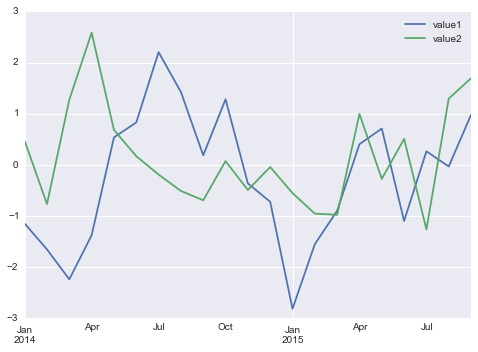

In [70]:
plt.figure(figsize=(10, 5))
values.plot(); 

In [71]:
values.resample('q')  # downsamples using mean for the quarter 

,value1,value2
2014-03-31,-1.677525,0.326913
2014-06-30,-0.001740,1.147702
2014-09-30,1.273375,-0.462342
2014-12-31,0.067673,-0.151648
2015-03-31,-1.752036,-0.825488
2015-06-30,0.007415,0.411678
2015-09-30,0.405899,0.577963


In [72]:
values.resample('q', how='max')

,value1,value2
2014-03-31,-1.145554,1.275031
2014-06-30,0.830726,2.586536
2014-09-30,2.205524,-0.188124
2014-12-31,1.283815,0.074214
2015-03-31,-0.895406,-0.550271
2015-06-30,0.711220,0.997154
2015-09-30,0.980959,1.695631


In [73]:
values.resample('d').head()  # upsampling, note default fill method is NaN

,value1,value2
2014-01-31,-1.145554,0.469475
2014-02-01,NaN,NaN
2014-02-02,NaN,NaN
2014-02-03,NaN,NaN
2014-02-04,NaN,NaN


In [74]:
values.resample('d', fill_method='bfill').head()  # back fill missing values

,value1,value2
2014-01-31,-1.145554,0.469475
2014-02-01,-1.651611,-0.763767
2014-02-02,-1.651611,-0.763767
2014-02-03,-1.651611,-0.763767
2014-02-04,-1.651611,-0.763767


In [75]:
values.resample('d', fill_method='ffill').head()  # forward fill missing values 

,value1,value2
2014-01-31,-1.145554,0.469475
2014-02-01,-1.145554,0.469475
2014-02-02,-1.145554,0.469475
2014-02-03,-1.145554,0.469475
2014-02-04,-1.145554,0.469475


###Missing Values

In [76]:
d = {'a' : np.array([0.3, 2.5, 1.7, np.nan, 6.3, np.nan]),
     'b' : np.array([np.nan, 3.1, 1.2, np.nan, 2.7, 0.9])}
df = pd.DataFrame(d)

In [77]:
df

,a,b
0,0.3,NaN
1,2.5,3.1
2,1.7,1.2
3,NaN,NaN
4,6.3,2.7
5,NaN,0.9


In [78]:
df['a'].isnull()  # boolean check for missing values

0    False
1    False
2    False
3     True
4    False
5     True
Name: a, dtype: bool

In [79]:
df['b'].notnull()  # boolean check non-missing values 

0    False
1     True
2     True
3    False
4     True
5     True
Name: b, dtype: bool

In [80]:
df.dropna()  # list-wise deletion

,a,b
1,2.5,3.1
2,1.7,1.2
4,6.3,2.7


In [81]:
df.dropna(how='all')  # drop only where entire is null 

,a,b
0,0.3,NaN
1,2.5,3.1
2,1.7,1.2
4,6.3,2.7
5,NaN,0.9


In [82]:
df.dropna(subset=['a'])  # drop rows only where 'a' contains null values

,a,b
0,0.3,NaN
1,2.5,3.1
2,1.7,1.2
4,6.3,2.7


In [83]:
df.fillna(0)  # fill missing with zeros

,a,b
0,0.3,0.0
1,2.5,3.1
2,1.7,1.2
3,0.0,0.0
4,6.3,2.7
5,0.0,0.9


In [84]:
df.fillna(method='ffill')  # forward fill missing values, eqivalent to 'pad'

,a,b
0,0.3,NaN
1,2.5,3.1
2,1.7,1.2
3,1.7,1.2
4,6.3,2.7
5,6.3,0.9


In [85]:
df.fillna(method='bfill')  # back fill missing values

,a,b
0,0.3,3.1
1,2.5,3.1
2,1.7,1.2
3,6.3,2.7
4,6.3,2.7
5,NaN,0.9
